# HITO 1

##### Los dos enunciados deben estar clasificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema.
    Se encomienda desarrollar un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales.
    Para este caso el vector objetivo corresponde a ‘income’, el cual dado los valores que puede tomar se recodificará de manera binaria tomando el valor de 1 si un individuo presenta un salario sobre los 50.000 dólares, y 0 si un individuo presenta un salario bajo los 50.000 dólares.
    Las demás variables en el dataframe corresponden a los atributos disponibles para implementar el modelo predictivo.
    En este caso el vector objetivo es de naturaleza discreta, por lo que se implementará el uso de un modelo de clasificación logística.
    
    Respecto a las métricas de desempeño, una manera de evaluar el desempeño es cruzar la información de la predicción con las etiquetas reales de nuestra muestra de validación. Esto es una matriz de confusión, y permite observar la cantidad de observaciones predichas correctamente. A partir de esta matriz es posible calcular el porcentaje de casos predichos correctamente por sobre el total de casos, lo que se conoce como accuracy.
    Hay que tener en consideración que esta medida no hace distinción frente a los tipos de errores (falsos negativos y falsos positivos); es por esto por lo que se calculan dos medidas extras, conocidas como precision y recall.
    Precision mide la fracción de predicciones correctas entre las etiquetas positivas y Recall mide la fracción de verdaderos positivos predichos por el modelo.
    Adicionalmente, existe otra medida que relaciona los valores de Precision y Recall. Esta medida se llama F1 y representa la media armónica de dichos valores.
    Este valor penaliza los valores bajos. F1 alcanza un máximo de 1 cuando Precision y Recall son 1, y 0 cuando Precision o Recall son 0, aún cuando una de las dos medidas sea 1.

##### Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación.

In [1]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Visualización
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import missingno as msngo

# Modelación
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Métricas de evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Otros
import warnings
warnings.filterwarnings("ignore")

### Listado librerías

    Las librerías se obtuvieron desde 'conda list'
    
    # Name                    Version                   Build
    matplotlib                3.5.2            py39haa95532_0
    numpy                     1.21.5           py39h7a0a035_3
    pandas                    1.4.4            py39hd77b12b_0
    scikit-learn              1.0.2            py39hf11a4ad_1
    scipy                     1.9.1            py39he11b74f_0
    seaborn                   0.11.2             pyhd3eb1b0_0
    statsmodels               0.13.2           py39h2bbff1b_0

##### Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos.
    La base de datos presenta 15 variables, de las cuales desde la organización sugieren la recodificación de algunas. A continuación, se detalla el proceso realizado:

    - ‘income’: Se utilizó Binary-Encoding para binarizar los valores de la variable. Se hizo uso de la función pd.get_dummies() con el argumento drop_first=True
    - ‘ocupation’, ‘workclass’, ‘education’, ‘marital-status’, ‘native-country’: Estas variables se recodificaron como ‘collars’, ‘workclass_recod’, ‘educ_recod’, ‘civstatus’ y ‘region’.

    Para estas variables se utilizó el método .isin() de pandas, en conjunto con la función .select() de numpy. Con esto se logró disminuir los valores únicos de las variables definiendo subcategorías para los valores originales de cada variable.

    De manera adicional, se decidió para las variables ‘relationship’ y ‘gender’ reemplazar el carácter ‘-’ por ‘_’ para evitar posibles conflictos al procesar los datos. También se decidió convertir las letras de los valores categóricos a minúsculas como medida estándar para visualizar el dataframe modificado.

    Posterior a la recodificación se creó un dataframe llamado ‘df_mod’ que contiene las nuevas variables. Al hacer esto se eliminaron las variables originales.


    A continuación se realiza la recodificación:

In [2]:
na_values = ["?"]
df = pd.read_csv('income-db.csv', na_values=na_values)

In [3]:
df.shape

(48842, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Recodificación de variables

In [6]:
# Recodificación 'income' (vector objetivo)
# 1 corresponde a >= 50K usd
df['income'] = pd.get_dummies(df['income'], drop_first=True)

In [7]:
# Recodificación 'occupation'
conditions = [  df['occupation'].isin(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support']), 
                df['occupation'].isin(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']), 
                df['occupation'].isin(['Other-service', 'Armed-Forces'])]
                
choices = ['white_collar', 'blue_collar', 'others']

df['collars'] = np.select(conditions, choices, default=None)
df.collars.unique()

array(['blue_collar', None, 'others', 'white_collar'], dtype=object)

In [8]:
# Recodificación 'workclass'
conditions = [  df['workclass'].isin(['Private']),
                df['workclass'].isin(['Federal-gov']), 
                df['workclass'].isin(['State-gov', 'Local-gov']), 
                df['workclass'].isin(['Self-emp-inc', 'Self-emp-not-inc']),
                df['workclass'].isin(['Never-worked', 'Without-pay'])]
                
choices = ['private', 'federal_gov', 'state_level_gov', 'self_employed', 'unemployed']

df['workclass_recod'] = np.select(conditions, choices, default=None)
df.workclass_recod.unique()

array(['private', 'state_level_gov', None, 'self_employed', 'federal_gov',
       'unemployed'], dtype=object)

    Para la recodificación de 'workclass' se agregó la categoría 'private', ya que desde la organización sugieren recodificar siguiendo una nomenclatura similar propuesta. En vista que no estaba considerada esa categoría se tomó la decisión antes mencionada.

In [9]:
# Recodificación 'education'
conditions = [  df['education'].isin(['Preschool']),
                df['education'].isin(['1st-4th', '5th-6th']), 
                df['education'].isin(['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad']), 
                df['education'].isin(['Assoc-voc', 'Assoc-acdm', 'Some-college']),
                df['education'].isin(['Bachelors', 'Masters', 'Prof-school', 'Doctorate'])]
                
choices = ['preschool', 'elementary_school', 'high_school', 'college', 'university']

df['educ_recod'] = np.select(conditions, choices, default=None)
df.educ_recod.unique()

array(['high_school', 'college', 'university', 'elementary_school',
       'preschool'], dtype=object)

In [10]:
# Recodificación 'marital-status'
conditions = [  df['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']),
                df['marital-status'].isin(['Divorced']), 
                df['marital-status'].isin(['Separated']), 
                df['marital-status'].isin(['Widowed']),
                df['marital-status'].isin(['Never-married'])]
                
choices = ['married', 'divorced', 'separated', 'widowed', 'never_married']

df['civstatus'] = np.select(conditions, choices, default=None)
df.civstatus.unique()

array(['never_married', 'married', 'widowed', 'divorced', 'separated'],
      dtype=object)

    De manera similar a la recodificación realizada en 'workclass', para la recodificación de 'marital-status' se agregó la categoría 'never_married'.

In [11]:
# Recodificación 'native-country'
# Al observar la lista de paises, estos solo pertecenen a 3 continentes
# South no se consideró
conditions = [  df['native-country'].isin(['Canada', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'Guatemala',
                                            'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
                                            'Puerto-Rico', 'Trinadad&Tobago', 'United-States']),

                df['native-country'].isin(['Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'Taiwan',
                                            'Thailand', 'Vietnam']), 

                df['native-country'].isin(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland',
                                            'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'])]
                
choices = ['america', 'asia', 'europe']

df['region'] = np.select(conditions, choices, default=None)
df.region.unique()

array(['america', None, 'europe', 'asia'], dtype=object)

    En la recodificación de 'native-country', se consultó a la organización  respecto a los valores 'Columbia' y 'South'. Esta indicó considerar 'Columbia' como parte del continente americano y 'South' no considerarla y dejarla como valor 'None'.

In [12]:
df["relationship"] = df["relationship"].replace("-", "_", regex=True).str.lower()
df["race"] = df["race"].replace("-", "_", regex=True).str.lower()
df["gender"] = df["gender"].str.lower()

In [13]:
df_drop = df.drop(['occupation', 'workclass', 'education', 'marital-status', 'native-country'], axis=1)
df_mod = df_drop.rename(columns={
    'educational-num':'educational_num', 
    'capital-gain':'capital_gain', 
    'capital-loss':'capital_loss', 
    'hours-per-week':'hours_per_week'
})

# HITO 2

# Vector objetivo.

#### Porcentaje de datos perdidos en el vector objetivo

In [14]:
# Datos perdidos en el vector objetivo
df_mod['income'].isna().value_counts('%')*100

False    100.0
Name: income, dtype: float64

#### Porcentajes de los valores de income

In [15]:
# Porcentajes de los valores de income
df_mod['income'].value_counts('%')*100

0    76.071823
1    23.928177
Name: income, dtype: float64

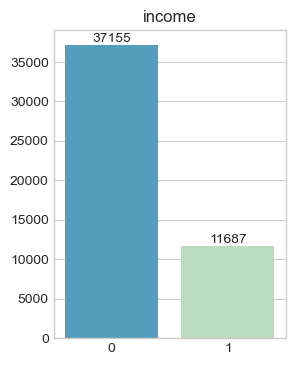

In [16]:
plt.figure(figsize=(3,4))
ax = sns.countplot(df_mod['income'], palette='GnBu_r')
plt.xlabel("")
plt.ylabel("")
plt.title('income')
for i in ax.containers:
        ax.bar_label(i, label_type='edge')

    A partir del método value_counts() y del gráfico mostrado, se observa que la variable objetivo no está equilibrada. El 76% corresponde a personas con ingresos inferiores a 50.000 dólares anuales. Tampoco contiene datos perdidos.

# Variables continuas y categóricas

### Variables continuas

In [17]:
df_mod.drop(['income'], axis=1).describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.loc[:, ['education', 'educational-num', 'educ_recod']].head(4)

,education,educational-num,educ_recod
0,11th,7,high_school
1,HS-grad,9,high_school
2,Assoc-acdm,12,college
3,Some-college,10,college


In [19]:
df.loc[:, ['education', 'educational-num', 'educ_recod']][df['educational-num'] == 16].sample()

,education,educational-num,educ_recod
43598,Doctorate,16,university


    Al aplicar el método .describe() al dataframe modificado, este considera solo las variables continuas para calcular las medidas descriptivas.

    De la variable 'age' se observa que la edad mínima en que un individuo es considerado en el sistema es a los 17 años. También se observa que el 75% de los individuos en la muestra tiene como máximo 48 años de edad.

    En 'educational_num' se observa que el 75% de los individuos tiene un nivel educacional que varía entre preescolar y grado 'college'. El 25% restante tiene estudios superiores de grado universitario.
    La educación alcanzada por algunos individuos es el asignado como 16 que corresponde a Doctorado.

### Datos perdidos

In [20]:
continuous_colums = ['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']
print('Cantidad de datos perdidos','\n')
for data in continuous_colums:
    print(data,':\n',df_mod[data].isna().value_counts(),'\n','-'*40)

Cantidad de datos perdidos 

age :
 False    48842
Name: age, dtype: int64 
 ----------------------------------------
fnlwgt :
 False    48842
Name: fnlwgt, dtype: int64 
 ----------------------------------------
educational_num :
 False    48842
Name: educational_num, dtype: int64 
 ----------------------------------------
capital_gain :
 False    48842
Name: capital_gain, dtype: int64 
 ----------------------------------------
capital_loss :
 False    48842
Name: capital_loss, dtype: int64 
 ----------------------------------------
hours_per_week :
 False    48842
Name: hours_per_week, dtype: int64 
 ----------------------------------------


    Ninguna de las variables continuas presenta valores perdidos

In [21]:
(df_mod.educational_num.value_counts('%')*100).sort_index()

1      0.169936
2      0.505712
3      1.042136
4      1.955284
5      1.547848
6      2.843864
7      3.709922
8      1.345154
9     32.316449
10    22.271815
11     4.219729
12     3.277917
13    16.430531
14     5.439990
15     1.707547
16     1.216166
Name: educational_num, dtype: float64

In [22]:
df_mod.capital_gain.value_counts().head(4)

0        44807
15024      513
7688       410
7298       364
Name: capital_gain, dtype: int64

    Para 'capital_gain', el método .describe() no muestra demasiada información. Se observa que la media en ingresos generados por inversiones fuera del trabajo asalariado es de 1070 USD aproximadamente. 
    Para complementar la información se implementó el método value_counts. De este se observa que la cantidad de individuos que no generaron ingresos mediante inversiones fue de 44.807 lo que corresponde a casi un 92% del total de la muestra. El 8% restante corresponde a individuos que sí generaron ganancias, las que varían entre 7298 y 15024 USD.

In [23]:
df_mod.capital_loss.value_counts().head(4)

0       46560
1902      304
1977      253
1887      233
Name: capital_loss, dtype: int64

In [24]:
(df_mod.capital_loss.value_counts('%').sort_index()*100).head(4)

0      95.327792
155     0.002047
213     0.010237
323     0.010237
Name: capital_loss, dtype: float64

    En el caso de 'capital_loss', esta variable presenta una gran cantidad de individuos que no sufrieron pérdidas por inversiones fuera del trabajo asalariado, que corresponde a cerca de un 95% del total de la muestra. Del método .describe() se observa que la media de pérdidas generadas fue de 87.5 USD, una cifra sustancialmente baja si se compara con aquellos individuos que alcanzaron una pérdida máxima de 4356 USD. Cabe señalar que aquellos que sufrieron tal cuantiosa pérdida solo representan a un 0.006% de la muestra.

In [25]:
df_mod.hours_per_week.value_counts('%').sort_index(ascending=False).head(4)

99    0.002805
98    0.000287
97    0.000041
96    0.000184
Name: hours_per_week, dtype: float64

    Finalmente, la variable 'hours_per_week' presenta una media de horas trabajadas a la semana de aproximadamente 40 horas. El rango de esta variable va desde 1 hora hasta las 99, lo que implicaría que aquellos individuos que alcanzan este máximo tendrían que trabajar alrededor de 14 horas diarias de lunes a domingo.
    El percentil 75 indica que el 75% de la muestra trabaja a la semana 45 horas o menos.
    
    De manera gráfica, lo comentado anteriormente se ve representado en los histogramas mostrados a continuación:

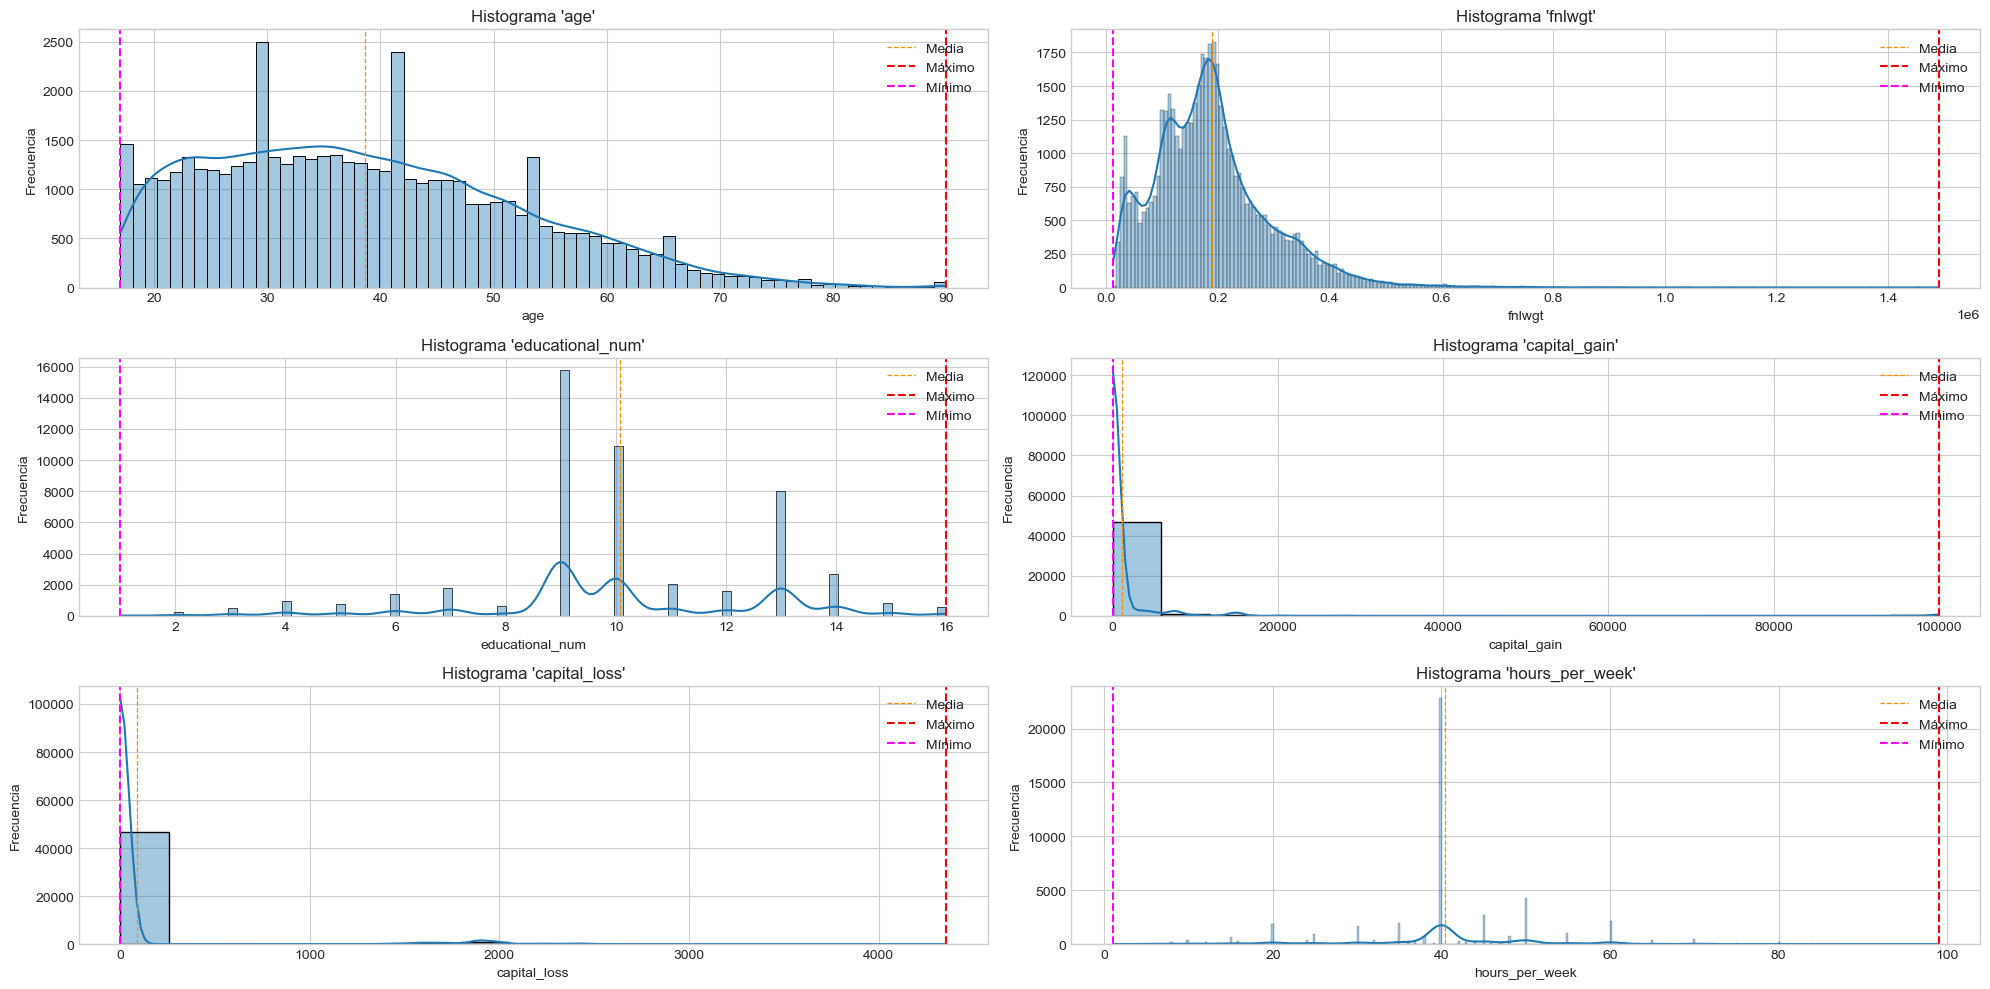

In [26]:
plt.figure(figsize=(20, 10))
for index, value in enumerate(continuous_colums):
    plt.subplot(3, 2, index + 1)
    sns.histplot(x=df_mod[value], kde=True, alpha=.4)
    plt.axvline(df_mod[value].mean(), color='darkorange', linestyle='--', label='Media', lw=.9)
    plt.axvline(df_mod[value].max(), color='red', linestyle='--', label='Máximo')
    plt.axvline(df_mod[value].min(), color='magenta', linestyle='--', label='Mínimo')
    plt.legend(loc='upper right')
    plt.title(f"Histograma '{value}'")
    plt.ylabel("Frecuencia")
plt.tight_layout()

    Al observar el gráfico, es posible decir que un gran porcentaje de las personas no supera los 50 años y la edad media es cercana a los 40 años.
    Existe una cantidad de personas cercana a los 16.000, cuya educación corresponde a la designada como '9' (HS-grad) y cuya recodificación es 'high-school'.
    Para capital_loss se observa una gran cantidad acumulada de personas que han perdido dinero en inversiones pero de un orden de magnitud relativamente bajo.

    Lo anterior calza con lo obtenido mediante .describe(), pero de esta manera es más fácil su visualización y entendimiento.

### Correlación de las variables continuas

In [27]:
df_mod.corr()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


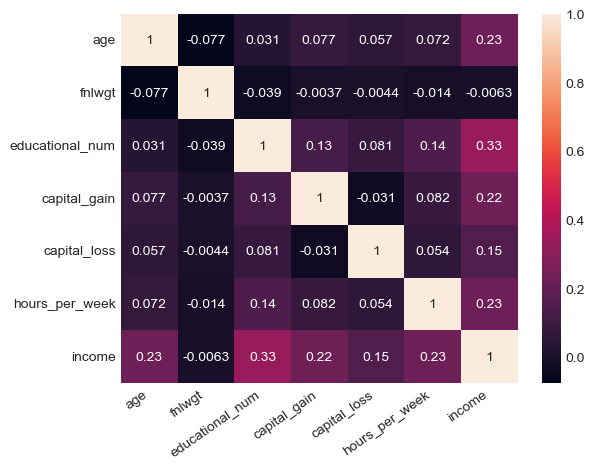

In [28]:
sns.heatmap(df_mod.corr(), annot=True)
plt.xticks(rotation=35, ha='right');

    Al observar el heatmap generado se aprecia que las varibles continuas tienen en general una muy baja correlación entre ellas. Sin embargo, presentan una mejor correlación con el vector objetivo.
    Hay que tener en cuenta que la finalidad de la correlación es cuantificar el grado en que dos variables viajan juntas.
    Al finalizar el modelo predictivo se sabrá en qué grado afectan estas variables al vector objetivo.

### Variables categóricas

In [29]:
categorical_columns = ['relationship', 'race', 'gender', 'collars', 'workclass_recod', 'educ_recod', 'civstatus', 'region']
print('Cantidad de datos perdidos','\n')
for data in categorical_columns:
    print(data,':\n', df_mod[data].isna().value_counts(),'\n','-'*40)

Cantidad de datos perdidos 

relationship :
 False    48842
Name: relationship, dtype: int64 
 ----------------------------------------
race :
 False    48842
Name: race, dtype: int64 
 ----------------------------------------
gender :
 False    48842
Name: gender, dtype: int64 
 ----------------------------------------
collars :
 False    46033
True      2809
Name: collars, dtype: int64 
 ----------------------------------------
workclass_recod :
 False    46043
True      2799
Name: workclass_recod, dtype: int64 
 ----------------------------------------
educ_recod :
 False    48842
Name: educ_recod, dtype: int64 
 ----------------------------------------
civstatus :
 False    48842
Name: civstatus, dtype: int64 
 ----------------------------------------
region :
 False    47870
True       972
Name: region, dtype: int64 
 ----------------------------------------


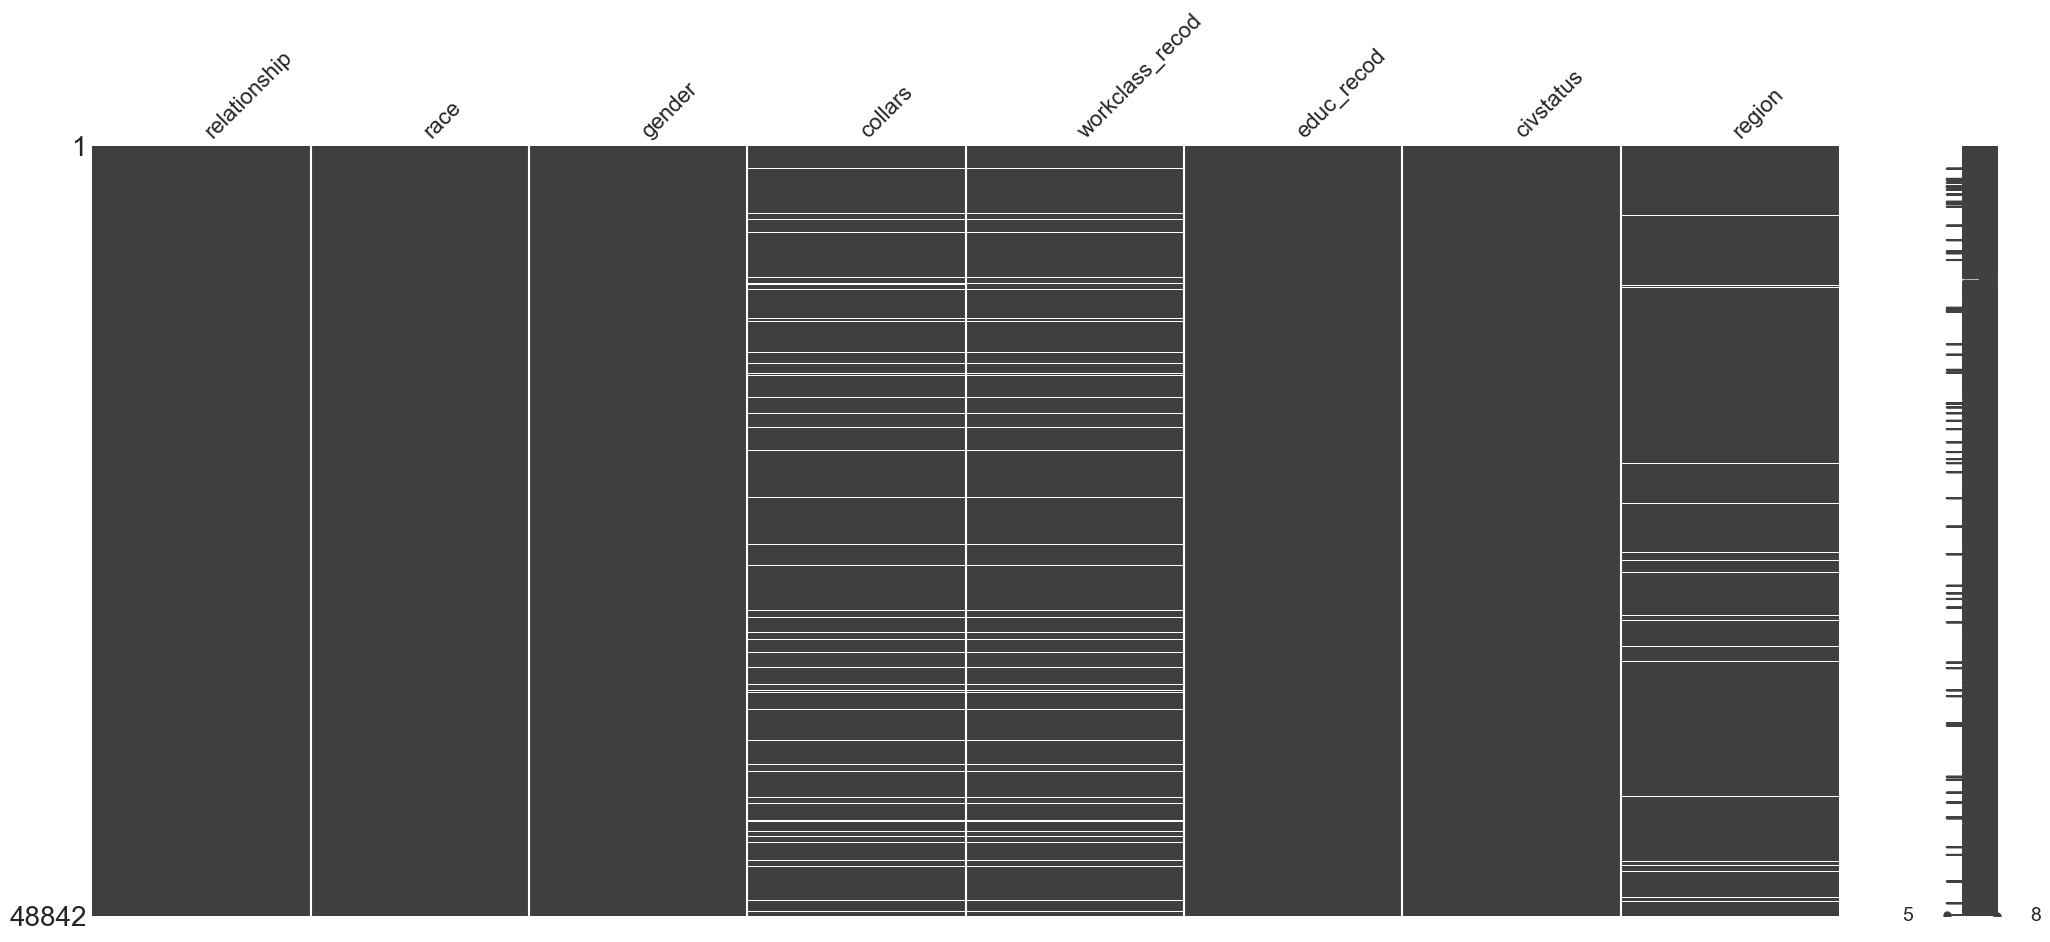

In [30]:
msngo.matrix(df_mod.loc[:,categorical_columns]);

    Con esta matriz es posible notar de manera más visual qué variables presentan datos perdidos, los que están representados por las líneas blancas.

    Las variables 'collars', 'workclass_recod' y 'region' presentan datos perdidos.
    A continuación se muestra el porcentaje de estos en la muestra.

In [31]:
variables_con_nulos = ['collars', 'workclass_recod', 'region']
for data in variables_con_nulos:
    print(data,':\n', round(df_mod[data].isna().value_counts('%')*100,4),'\n','-'*40)

collars :
 False    94.2488
True      5.7512
Name: collars, dtype: float64 
 ----------------------------------------
workclass_recod :
 False    94.2693
True      5.7307
Name: workclass_recod, dtype: float64 
 ----------------------------------------
region :
 False    98.0099
True      1.9901
Name: region, dtype: float64 
 ----------------------------------------


    Los porcentajes de datos nulos para 'collars', 'workclass_recod' y 'region' son 5.75%, 5.73% y 1.99% y corresponden a 2809, 2799 y 972 datos respectivamente.

    Dados estos valores, se toma la decisión de consultar a la organización qué porcentaje de datos nulos por columna es considerado alto para no incluirla en el modelo. La respuesta fue que por lo general un 5% de datos nulos es considerado alto.
    
    Ante la respuesta recibida, se toma como criterio no incluir aquellas columnas que tengan un porcentaje de datos perdidos mayor a 5%. Esto conlleva a no considerar las variables 'collars' y 'workclass_recod' en el conjunto de atributos a utilizar en el modelo predictivo.

    Como se decidió no considerar las columnas 'collars' y 'workclass_recod' en el conjunto de atributos, se crea un nuevo dataframe con nombre df_2 que contiene los atributos a considerar para la modelación.

In [32]:
df_2 = df_mod.drop(['collars', 'workclass_recod'], axis=1)
df_2.sample()

,age,fnlwgt,educational_num,relationship,race,gender,capital_gain,capital_loss,hours_per_week,income,educ_recod,civstatus,region
37315,44,219591,10,husband,white,male,0,0,40,0,college,married,america


In [33]:
df_2.shape

(48842, 13)

    Realizada la reestructuración del dataframe a utilizar para la modelación, a continuación se muestran para cada variable los porcentajes de las categorías de cada variable.
    Cabe señalar que los datos perdidos no afectan el cálculo del porcentaje, ya que el método .value_counts() no los considera.

In [34]:
categorical_columns_df_2 = ['relationship', 'race', 'gender', 'educ_recod', 'civstatus', 'region']
print('Porcentajes de las categorías para cada variable en la muestra','\n')
for variable in categorical_columns_df_2:
    print(variable,':\n', round(df_2[variable].value_counts('%')*100,2),'\n','-'*40)

Porcentajes de las categorías para cada variable en la muestra 

relationship :
 husband           40.37
not_in_family     25.76
own_child         15.52
unmarried         10.49
wife               4.77
other_relative     3.08
Name: relationship, dtype: float64 
 ----------------------------------------
race :
 white                 85.50
black                  9.59
asian_pac_islander     3.11
amer_indian_eskimo     0.96
other                  0.83
Name: race, dtype: float64 
 ----------------------------------------
gender :
 male      66.85
female    33.15
Name: gender, dtype: float64 
 ----------------------------------------
educ_recod :
 high_school          43.72
college              29.77
university           24.79
elementary_school     1.55
preschool             0.17
Name: educ_recod, dtype: float64 
 ----------------------------------------
civstatus :
 married          47.18
never_married    33.00
divorced         13.58
separated         3.13
widowed           3.11
Name: civsta

    Lo anterior se mejor representado en los gráficos de barras. En estos, se muestran las cantidades de cada categoría según la variable a la que pertenecen.

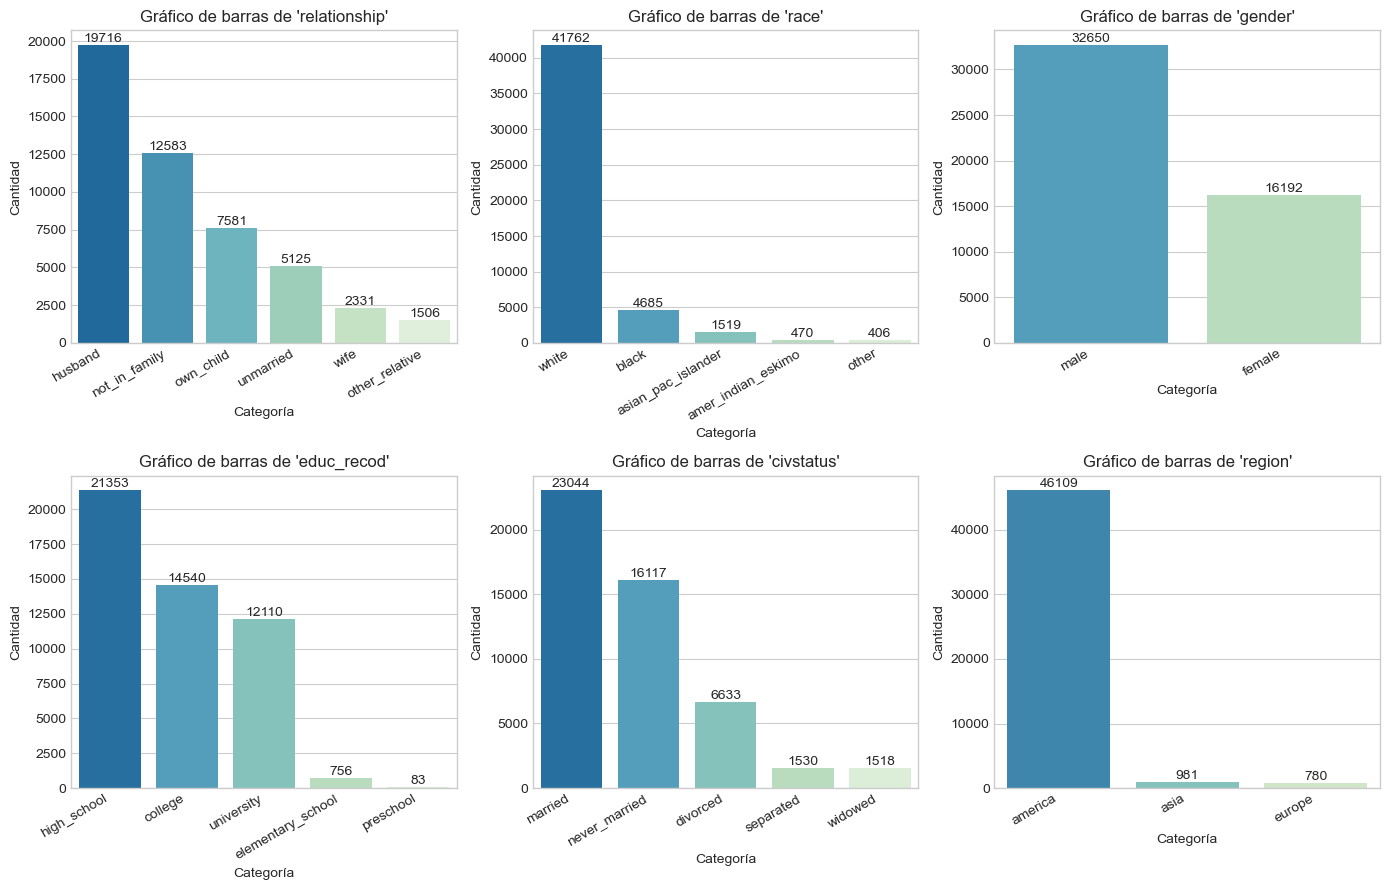

In [35]:
plt.figure(figsize=(14, 9))
for index, value in enumerate(categorical_columns_df_2):
    plt.subplot(2, 3, index + 1)
    ax = sns.countplot(df_2[value], palette='GnBu_r', order=df_2[value].value_counts().index)
    plt.title(f"Gráfico de barras de '{value}'")
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad')
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
plt.tight_layout()

    Antes de entrar de lleno en la modelación y habiendo seleccionado las variables a incluir en el modelo, se harán unos cambios al dataframe 'df_2'. Estos consideran la recodificación de las variables 'relationship', 'race', 'gender', 'educ_recod', 'civstatus' y 'region' para que el modelo funcione correctamente cuando se analicen estas variables.

In [36]:
# nueva recodificación de variables 
variables_recod = ['relationship', 'race', 'gender', 'educ_recod', 'civstatus', 'region']
for variable in variables_recod:
    dummies = pd.get_dummies(df_2[variable], prefix=variable, drop_first=True)
    df_2 = pd.concat([df_2, dummies], axis=1)
    df_2.drop(variable, axis=1, inplace=True)

In [37]:
df_2.shape

(48842, 27)

In [38]:
df_2.columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'relationship_not_in_family',
       'relationship_other_relative', 'relationship_own_child',
       'relationship_unmarried', 'relationship_wife',
       'race_asian_pac_islander', 'race_black', 'race_other', 'race_white',
       'gender_male', 'educ_recod_elementary_school', 'educ_recod_high_school',
       'educ_recod_preschool', 'educ_recod_university', 'civstatus_married',
       'civstatus_never_married', 'civstatus_separated', 'civstatus_widowed',
       'region_asia', 'region_europe'],
      dtype='object')

In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           48842 non-null  int64
 1   fnlwgt                        48842 non-null  int64
 2   educational_num               48842 non-null  int64
 3   capital_gain                  48842 non-null  int64
 4   capital_loss                  48842 non-null  int64
 5   hours_per_week                48842 non-null  int64
 6   income                        48842 non-null  uint8
 7   relationship_not_in_family    48842 non-null  uint8
 8   relationship_other_relative   48842 non-null  uint8
 9   relationship_own_child        48842 non-null  uint8
 10  relationship_unmarried        48842 non-null  uint8
 11  relationship_wife             48842 non-null  uint8
 12  race_asian_pac_islander       48842 non-null  uint8
 13  race_black                    4

# HITO 3

    En esta primera iteración se incluyen todos los atributos para tener una base y desde ahí ir ajustando el modelo con la finalidad de aumentar el R-cuadrado, es decir, el poder explicativo del modelo.
    Se crea además una copia del dataframe original para evitar conflictos y se renombra como df_model.

In [40]:
df_model = df_2.copy()

In [41]:
model_logit_1 = smf.logit('income ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + relationship_not_in_family +\
                            relationship_other_relative + relationship_own_child + relationship_unmarried + relationship_wife + race_asian_pac_islander +\
                            race_black + race_other + race_white + gender_male + educ_recod_elementary_school + educ_recod_high_school + educ_recod_preschool +\
                            educ_recod_university + civstatus_married + civstatus_never_married + civstatus_separated + civstatus_widowed + region_asia + region_europe', df_model).fit()

Optimization terminated successfully.
         Current function value: 0.331350
         Iterations 11


In [42]:
model_logit_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Pseudo R-squared:     0.398     
Dependent Variable:      income               AIC:                  32421.5830
Date:                    2023-02-06 16:05     BIC:                  32659.0843
No. Observations:        48842                Log-Likelihood:       -16184.   
Df Model:                26                   LL-Null:              -26875.   
Df Residuals:            48815                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          11.0000                                              
------------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                    -7.9351   0.2910 -27.2662 0.0000  -8.5055 -7.3647
age                           0.0228   0.0012  18.3923 0.0000   0.0204  0.0253
fnlwgt                        0.0000   0.0000   5.6744 0.0000   0.0000  0.0000
educational_num               0.3039   0.0152  19.9833 0.0000   0.2741  0.3337
capital_gain                  0.0003   0.0000  38.6158 0.0000   0.0003  0.0003
capital_loss                  0.0007   0.0000  22.4655 0.0000   0.0006  0.0007
hours_per_week                0.0305   0.0012  25.1466 0.0000   0.0281  0.0328
relationship_not_in_family   -1.0281   0.1270  -8.0939 0.0000  -1.2770 -0.7791
relationship_other_relative  -1.6007   0.1826  -8.7651 0.0000  -1.9587 -1.2428
relationship_own_child       -2.0717   0.1597 -12.9751 0.0000  -2.3846 -1.7587
relationship_unmarried       -1.2523   0.1437  -8.7176 0.0000  -1.5339 -0.9708
relationship_wife             1.0272   0.0806  12.7416 0.0000   0.8692  1.1852
race_asian_pac_islander       0.4667   0.2057   2.2688 0.0233   0.0635  0.8699
race_black                    0.2095   0.1834   1.1422 0.2534  -0.1500  0.5689
race_other                    0.1351   0.2585   0.5224 0.6014  -0.3716  0.6417
race_white                    0.4976   0.1745   2.8521 0.0043   0.1557  0.8396
gender_male                   0.6517   0.0621  10.5029 0.0000   0.5301  0.7733
educ_recod_elementary_school  0.0866   0.2209   0.3923 0.6948  -0.3463  0.5196
educ_recod_high_school       -0.1703   0.0448  -3.8019 0.0001  -0.2582 -0.0825
educ_recod_preschool         -3.9671   3.7809  -1.0492 0.2941 -11.3776  3.4434
educ_recod_university         0.1650   0.0580   2.8466 0.0044   0.0514  0.2787
civstatus_married             0.6832   0.1317   5.1870 0.0000   0.4250  0.9413
civstatus_never_married      -0.4993   0.0703  -7.1043 0.0000  -0.6371 -0.3616
civstatus_separated          -0.1037   0.1306  -0.7935 0.4275  -0.3597  0.1524
civstatus_widowed             0.0124   0.1233   0.1007 0.9198  -0.2292  0.2540
region_asia                  -0.1790   0.1336  -1.3401 0.1802  -0.4409  0.0828
region_europe                 0.1839   0.1037   1.7738 0.0761  -0.0193  0.3870
==============================================================================

"""

    Con la obtención de los estadísticos de bondad de ajuste y los p_values para cada atributo. Ahora se realizará la depuración del modelo con un intervalo de confianza al 95%.
    Con esto, se excluirán aquellas variables que tengan un p_value mayor a 0.05

In [43]:
def p_value_table(modelo, p_value_menor_a=0.05):
    """
    Muestra una tabla con los valores de p_value de cada atributo menores o iguales a un valor condicional

    Parameters
    ----------
    modelo: variable
                    modelo de regresión logística ajustado
    p_value_menor_a: float
                    valor condicional para el p_value a mostrar
    
    Returns:
            Retorna la tabla con los p_values menores o iguales a la condición exigida
    """
    p_values = modelo.summary2().tables[1]
    return round((p_values.loc[:, ['P>|z|']][p_values['P>|z|'] <= p_value_menor_a]),5)

In [44]:
(p_value_table(modelo=model_logit_1, p_value_menor_a=0.05))

,P>|z|
Intercept,0.00000
age,0.00000
fnlwgt,0.00000
educational_num,0.00000
capital_gain,0.00000
capital_loss,0.00000
hours_per_week,0.00000
relationship_not_in_family,0.00000
relationship_other_relative,0.00000
relationship_own_child,0.00000


    Los valores p_value mostrados en la tabla superior, al ser menores a 0.05 indican que son variables significativas, con lo que se tiene evidencia para rechazar la hipótesis nula.

    Con los atributos identificados se crea otro modelo logístico que los incluya

In [45]:
model_logit_2 =  smf.logit('income ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + relationship_not_in_family +\
                            relationship_other_relative + relationship_own_child + relationship_unmarried + relationship_wife + race_asian_pac_islander +\
                            race_white + gender_male + educ_recod_high_school + educ_recod_university + civstatus_married + civstatus_never_married', df_model).fit()

Optimization terminated successfully.
         Current function value: 0.331460
         Iterations 9


In [46]:
model_logit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.398     
Dependent Variable:      income              AIC:                 32416.3750
Date:                    2023-02-06 16:05    BIC:                 32583.5056
No. Observations:        48842               Log-Likelihood:      -16189.   
Df Model:                18                  LL-Null:             -26875.   
Df Residuals:            48823               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          9.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -7.7591   0.2239 -34.6563 0.0000 -8.1980 -7.3203
age                          0.0230   0.0012  18.7309 0.0000  0.0206  0.0254
fnlwgt                       0.0000   0.0000   5.7684 0.0000  0.0000  0.0000
educational_num              0.3030   0.0129  23.5334 0.0000  0.2778  0.3283
capital_gain                 0.0003   0.0000  38.6322 0.0000  0.0003  0.0003
capital_loss                 0.0007   0.0000  22.4620 0.0000  0.0006  0.0007
hours_per_week               0.0305   0.0012  25.1805 0.0000  0.0281  0.0329
relationship_not_in_family  -1.0301   0.1269  -8.1185 0.0000 -1.2788 -0.7814
relationship_other_relative -1.6071   0.1827  -8.7970 0.0000 -1.9651 -1.2490
relationship_own_child      -2.0736   0.1596 -12.9927 0.0000 -2.3864 -1.7608
relationship_unmarried      -1.2559   0.1435  -8.7516 0.0000 -1.5371 -0.9746
relationship_wife            1.0227   0.0803  12.7360 0.0000  0.8653  1.1800
race_asian_pac_islander      0.1811   0.0951   1.9039 0.0569 -0.0053  0.3676
race_white                   0.3205   0.0546   5.8662 0.0000  0.2134  0.4276
gender_male                  0.6460   0.0616  10.4917 0.0000  0.5253  0.7667
educ_recod_high_school      -0.1715   0.0410  -4.1881 0.0000 -0.2518 -0.0913
educ_recod_university        0.1666   0.0538   3.0962 0.0020  0.0611  0.2721
civstatus_married            0.6937   0.1293   5.3635 0.0000  0.4402  0.9472
civstatus_never_married     -0.4851   0.0666  -7.2833 0.0000 -0.6157 -0.3546
============================================================================

"""

    Al comparar las métricas de bondad de ajuste, se puede observar que los valores de Pseudo R-squared indican que ambos modelos tienen el mismo poder explicativo de 39.8% pese a la disminución de variables en el segundo modelo.
    Siguiendo con la comparación, los valores de AIC y BIC son menores en el modelo 2, lo que convertiría a este modelo en un mejor candidato. Hay que tener en consideración que estas métricas penalizan los modelos por la cantidad de parámetros. Una buena práctica es complementar estos valores con otras métricas.
    Ahora bien, al comparar los valores de Log-Likelihood, estos indican que el primer modelo es levemente mejor al tener un valor más alto, lo que se interpreta como un mejor ajuste de los datos. 

### Definición de las estrategias de Modelación predictiva

    Para la modelación predictiva se hará uso de machine learning.
    La finalidad es realizar predicciones no vistas por el modelo, tomando como mejor modelo aquél que muestre un mejor desempeño.
    En regresión se midió el desempeño mediante la reducción del error cuadrático, obteniendo un modelo que tuviera mayor poder explicativo. En el caso de clasificación, se busca aumentar la tasa de clases predichas correctamente y la reducción de falsos positivos y falsos negativos.
    Se implementarán cuatro modelos predictivos, el primero considerará aquellas variables para un intervalo de confianza al 95% las que se obtuvieron anteriormente en la modelación descriptiva.
    A partir del segundo modelo, se modelará para un intervalo de confianza al 99 sin modificar hiperparámetros. En el tercer y cuarto modelo se modificarán los hiperparámetros fit_intercept y class_weight respectivamente.

# HITO 4

## Primer modelo
    Variables para un intervalo de confianza al 95%

In [47]:
df_sklearn_95 = df_model.loc[:, ['income', 'age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 
                                    'relationship_not_in_family', 'relationship_other_relative', 'relationship_own_child', 'relationship_unmarried',
                                    'relationship_wife', 'race_asian_pac_islander', 'race_white', 'gender_male', 'educ_recod_high_school', 
                                    'educ_recod_university', 'civstatus_married', 'civstatus_never_married']]

In [48]:
df_sklearn_95.shape

(48842, 19)

    Para este primer modelo se realiza el paso a paso de la modelación y obtención de métricas de desempeño. A partir del segundo modelo se implementa una función que realiza este proceso.

In [49]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# generación de subconjuntos de entrenamiento y pruebas
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(df_sklearn_95.loc[:, 'age':'civstatus_never_married'], df_sklearn_95['income'], test_size=.33, random_state=7)

In [50]:
# estandarizacion de la matriz de entrenamiento y prueba
scaler_v1 = StandardScaler().fit(X_train_v1)

# transformamos los conjuntos de entrenamiento y pruebas con la transformación entrenada sobre el conjunto de entrenamiento
x_train_std_v1 = scaler_v1.transform(X_train_v1)
x_test_std_v1 = scaler_v1.transform(X_test_v1)

# implementacion del modelo sin alterar los hiperparametros
default_model_v1 = LogisticRegression().fit(x_train_std_v1, y_train_v1)

# predicción de las clases
yhat_v1 = default_model_v1.predict(x_test_std_v1)

# predicción de la probabilidad para cada clase 
yhat_proba_v1 = default_model_v1.predict_proba(x_test_std_v1)

### Métricas de desempeño

In [51]:
# from sklearn.metrics import confusion_matrix
matriz_confusion_v1 = confusion_matrix(y_true=y_test_v1, y_pred=yhat_v1)
matriz_confusion_v1

array([[11384,   893],
       [ 1685,  2156]], dtype=int64)

    Con la matriz de confusión, es posible observar la cantidad de casos exitosamente predichos en la diagonal principal de la siguiente manera.

                Verdadero Positivo |  Falso Positivo
               ------------------------------------------
                  Falso Negativo   |  Verdadero Negativo


    Una de las métricas de desempeño es el accuracy score, este mide el porcentaje de casos predichos correctamente por sobre el total de casos.

In [52]:
# from sklearn.metrics import accuracy_score
model_acc_score_v1 = accuracy_score(y_test_v1, yhat_v1)
model_acc_score_v1

0.8400545973445837

    La métrica reportada de 0.84 sugiere cierta exactitud de nuestro modelo. Sin embargo, hay que tener cuidado al interpretar este valor, ya que no hace distinción frente a los tipos de errores, sean faltos positivos o falsos negativos.

    Un benchmark para reflejar la capacidad de predicción al azar es dividir 1 por la cantidad de categorías del vector objetivo. De esta manera se obtiene un aproximado de la predicción correcta al azar.
    Para este caso, el benchmark es de 0.5. Entonces el accuracy score obtenido informa que el modelo tiene un desempeño 34% superior que una predicción aleatoria.

In [53]:
# from sklearn.metrics import precision_score, recall_score, f1_score

model_prec_score_v1 = precision_score(y_test_v1, yhat_v1)
model_recall_v1 = recall_score(y_test_v1, yhat_v1)
model_f1_score_v1 = f1_score(y_test_v1, yhat_v1)

print("Precision: ", model_prec_score_v1, "\nRecall: ", model_recall_v1,"\nF1 Score: ", model_f1_score_v1)

Precision:  0.7071170875696949 
Recall:  0.5613121582921115 
F1 Score:  0.625834542815675


    Los puntajes de precision y recall para este primer modelo indican que tiene un desempeño aceptable, pero que puede mejorar. El puntaje de recall es casi 14 puntos porcentuales más bajo que el de precision. Esto quiere decir que predice en menor exactitud la cantidad de verdaderos positivos. A su vez, precision predice de mejor manera las etiquetas positivas.

    Existe otra métrica que resume 'precision' y 'recall' en un solo valor. Esta medida es F1, y representa la media armónica entre ambos.
    Este valor pondera de mayor manera a los valores bajos, por lo que F1 será alto sólo cuando 'precision' y 'recall' lo sean.
    sklearn tiene una función que calcula el f1_score, además de una tabla resumen con las métricas calculadas llamada 'classification_report'. Para un correcto reporte de esta tabla es necesario usar la función print(), ya que el tipo de dato de classification_report es str.

In [54]:
#from sklearn.metrics import classification_report

# métricas de precision, recall y f1
print(classification_report(y_test_v1, yhat_v1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12277
           1       0.71      0.56      0.63      3841

    accuracy                           0.84     16118
   macro avg       0.79      0.74      0.76     16118
weighted avg       0.83      0.84      0.83     16118



    De acuerdo a lo calculado anteriormente y lo mostrado en la tabla resumen de 'classification_report', el modelo tiene problemas para clasificar correctamente la cantidad de verdaderos positivos de acuerdo a la métrica 'recall'. Esto sugiere que el modelo debe ser refactorizado de manera tal que mejore la capacidad predictiva.

##### Curva ROC modelo 1

    Un modelo de clasificación bien implementado debe considerar cuál es el rango de errores con el que se trabaja. Para medir esto se utiliza la curva ROC (Receiving Operating Characteristics), que evalúa la relación entre ambos errores.
    En el eje X va la tasa de falsos positivos, y en el eje Y la tasa de verdaderos positivos.
    La línea bisectriz representa el benchmark predictivo del modelo, que es este caso en 0.5

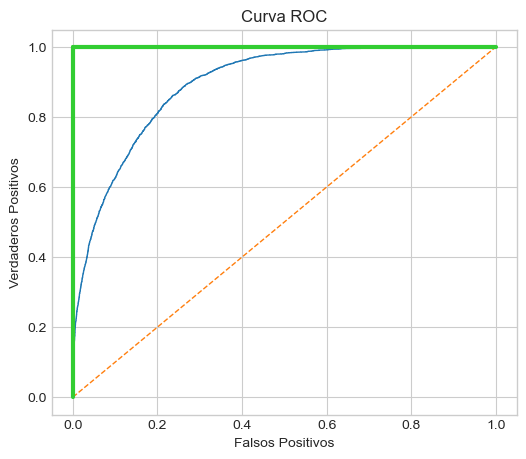

In [55]:
#from sklearn.metrics import roc_curve

# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat_pr_v1 = (default_model_v1.predict_proba(x_test_std_v1))[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test_v1, yhat_pr_v1)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

    Un modelo con capacidad predictiva adecuada debe tener una curva por sobre la bisectriz. Por el contrario, uno que presente un desempeño deficiente presentará la curva bajo la bisectriz.
    Lo ideal para una curva ROC es que tienda a acercarse a la esquina superior izquierda del gráfico.
    En este caso, la capacidad predictiva es adecuada.


    Una manera de resumir la calidad de una curva ROC es mediante otra métrica que calcula el área bajo la curva. Para estimar esta área se utiliza la función 'roc_auc_score' de sklearn.metrics

In [56]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_v1, yhat_pr_v1)

0.8946405010930008

    El valor de 0.89 indica que el modelo tiene un desempeño de 39% superior a un mecanismo de clasificación aleatoria.

## Segundo modelo

    Para este segundo modelo se considerarán las variables para un intervalo de confianza al 99%. Con esto, la variable 'race_asian_pac_islander' es eliminada.
    De manera adicional se eliminará la variable 'fnlwgt', la cual de acuerdo a la documentación de la base de datos corresponde a un ponderador muestral y se observará como afecta su eliminación al modelo predictivo.

In [57]:
(p_value_table(modelo=model_logit_1, p_value_menor_a=0.01))

,P>|z|
Intercept,0.00000
age,0.00000
fnlwgt,0.00000
educational_num,0.00000
capital_gain,0.00000
capital_loss,0.00000
hours_per_week,0.00000
relationship_not_in_family,0.00000
relationship_other_relative,0.00000
relationship_own_child,0.00000


In [58]:
df_sklearn_99 = df_model.loc[:, ['income', 'age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 
                                    'relationship_not_in_family', 'relationship_other_relative', 'relationship_own_child', 'relationship_unmarried',
                                    'relationship_wife', 'race_white', 'gender_male', 'educ_recod_high_school', 
                                    'educ_recod_university', 'civstatus_married', 'civstatus_never_married']]

    A contiuacion se crea una función para no hacer el proceso tan repetitivo de modelación.

In [59]:
def sklearn_model(dataframe, tamaño_testeo, semilla_random, fit_intercept_modelo=True, class_weight_modelo=None):
    """
    Esta función imprime en pantalla las métricas de desempeño para una modelación logística

    Parameters
    ----------
    dataframe: dataframe de pandas
                    dataframe del cual se obtienen los datos para la modelación y cálculo de métricas
    tamano_testeo: float
                    porcentaje del tamaño de los datos de pruebas expresdo en decimales
    semilla_random: int
                    valor pseudo aleatorio para replicar los resultados
    fit_intercept_modelo: bool, default=True
                    hiperparámetro. Agrega o no el intercepto
    class_weight_modelo: dict or 'balanced', default=None
                    Balancea las clases

    Returns
            None
    """
    
    # generación de subconjuntos de entrenamiento y pruebas
    X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['income'], axis=1), dataframe['income'], test_size=tamaño_testeo, random_state=semilla_random)

    # estandarizacion de la matriz de entrenamiento y prueba
    scaler = StandardScaler().fit(X_train)

    # transformamos los conjuntos de entrenamiento y pruebas con la transformación entrenada sobre el conjunto de entrenamiento
    x_train_std = scaler.transform(X_train)
    x_test_std = scaler.transform(X_test)

    # implementacion del modelo modificando los hiperparámetros
    default_model = LogisticRegression(fit_intercept=fit_intercept_modelo, class_weight=class_weight_modelo).fit(x_train_std, y_train)

    # predicción de las clases
    yhat = default_model.predict(x_test_std)

    # predicción de la probabilidad para cada clase 
    yhat_proba = default_model.predict_proba(x_test_std)

    # from sklearn.metrics import confusion_matrix
    matriz_confusion = confusion_matrix(y_true=y_test, y_pred=yhat)
    print("\nMatriz de confusión: \n", matriz_confusion,'\n','-'*80)

    # from sklearn.metrics import accuracy_score
    model_acc_score = accuracy_score(y_test, yhat)
    print("Accuracy score: ", model_acc_score)

    # from sklearn.metrics import precision_score, recall_score, f1_score
    model_prec_score = precision_score(y_test, yhat)
    model_recall = recall_score(y_test, yhat)
    model_f1_score = f1_score(y_test, yhat)
  
    print("Precision: ", model_prec_score, "\nRecall: ", model_recall,"\nF1 Score: ", model_f1_score,'\n','-'*80)


    #from sklearn.metrics import classification_report
    # métricas de precision, recall y f1
    print('Classification_report')
    print(classification_report(y_test, yhat),'-'*80)

    # reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
    yhat_pr = (default_model.predict_proba(x_test_std))[:, 1]

    #from sklearn.metrics import roc_curve
    # generamos los objetos de roc_cruve
    false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)

    # Plot ROC curve
    print('Curva ROC')
    plt.figure(figsize=(6,5))
    plt.title('\nCurva ROC')
    plt.plot(false_positive, true_positive, lw=1)
    plt.plot([0, 1], ls="--", lw=1)
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos');
    plt.show()

    #from sklearn.metrics import roc_auc_score
    auc_score = roc_auc_score(y_test, yhat_pr)
    print('-'*80)
    print("ROC auc score: \n", auc_score)

    El segundo modelo solo considera el intervalo de confianza al 99%, sin modificar los hiperparámetros.
    Los hiperparámetros ingresados en el llamado a la función corresponden a los valores por defecto.


Matriz de confusión: 
 [[11383   894]
 [ 1683  2158]] 
 --------------------------------------------------------------------------------
Accuracy score:  0.8401166397816107
Precision:  0.7070773263433814 
Recall:  0.5618328560270763 
F1 Score:  0.6261424633686348 
 --------------------------------------------------------------------------------
Classification_report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12277
           1       0.71      0.56      0.63      3841

    accuracy                           0.84     16118
   macro avg       0.79      0.74      0.76     16118
weighted avg       0.83      0.84      0.83     16118
 --------------------------------------------------------------------------------
Curva ROC


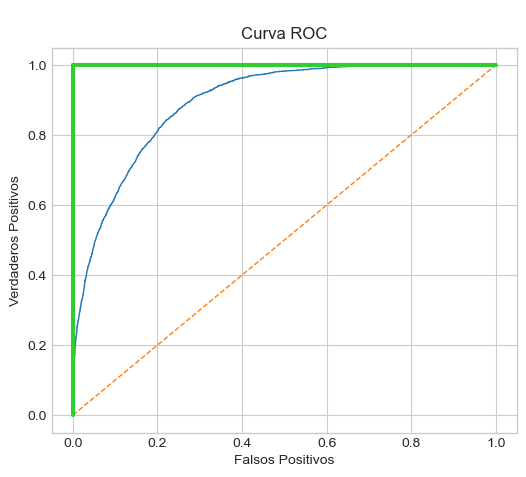

--------------------------------------------------------------------------------
ROC auc score: 
 0.8944752515572952


In [60]:
model_2 = sklearn_model(dataframe=df_sklearn_99, tamaño_testeo=.33, semilla_random=7, fit_intercept_modelo=True, class_weight_modelo=None)

    Al aumentar el intervalo de confianza, se eliminó una variable respecto al modelo anterior ya que según el p_value obtenido no tenía significancia. Adicionalmente se eliminó un ponderador muestral con la intención de observar su influencia en la predicción del modelo.
    A partir de las métricas obtenidas, se observa una variación tan pequeña en la matriz de confusión y en los demás puntajes obtenidos, que la tabla resumen de classification_report no muestra cambio alguno en sus valores. Tampoco se ve una variación significativa en el área bajo la curva ROC.

## Tercer modelo

    En este tercer modelo se utilzó el hiperparámetro fit_intercept=False, que por defecto es 'True'. Los demás parámetros permanecieron constantes.
    'fit_intercept' indica si se ajustará o no un término independiente(intercepto) en la ecuación de la recta de regresión logística. Si el valor es 'True' se utilizará un intercepto en el modelo; si en cambio, es 'False', como en este caso, no se utilizará un intercepto y por ende la recta de regresión logística pasará por el origen.


Matriz de confusión: 
 [[10863  1414]
 [ 1475  2366]] 
 --------------------------------------------------------------------------------
Accuracy score:  0.8207593994292096
Precision:  0.6259259259259259 
Recall:  0.615985420463421 
F1 Score:  0.6209158903031098 
 --------------------------------------------------------------------------------
Classification_report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12277
           1       0.63      0.62      0.62      3841

    accuracy                           0.82     16118
   macro avg       0.75      0.75      0.75     16118
weighted avg       0.82      0.82      0.82     16118
 --------------------------------------------------------------------------------
Curva ROC


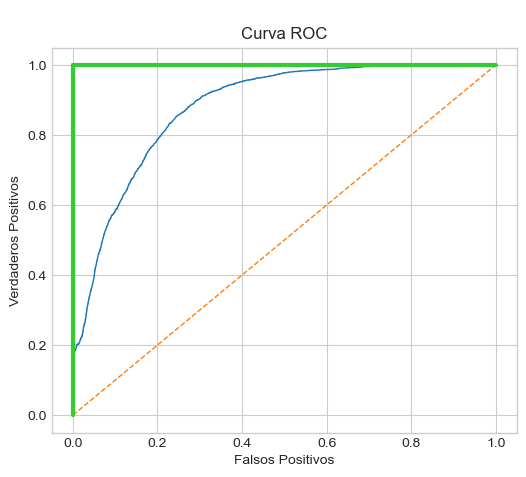

--------------------------------------------------------------------------------
ROC auc score: 
 0.8800785444774242


In [61]:
model_3 = sklearn_model(dataframe=df_sklearn_99, tamaño_testeo=.33, semilla_random=7, fit_intercept_modelo=False, class_weight_modelo=None)
model_3

## Cuarto modelo

    De manera similar al tercer modelo, en este se modifica solamente un hiperparámetro el cual corresponde a class_weight='balanced' mientras los demás parámetros permanecen constantes.
    'class_weight' se utiliza para balancear las clases durante el entrenamiento. En el caso de existir clases desbalanceadas, es decir, una clase tiene más muestras que otra, el modelo puede tener problemas para predecir. Con este parámetro se busca mitigar ese problema al dar más peso a las clases con menos muestras y equilibrándolas automáticamente asignando 'balanced' a class_weight.


Matriz de confusión: 
 [[8672 2475]
 [ 556 2950]] 
 --------------------------------------------------------------------------------
Accuracy score:  0.7931481607861871
Precision:  0.543778801843318 
Recall:  0.8414147176269253 
F1 Score:  0.660620311275333 
 --------------------------------------------------------------------------------
Classification_report
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11147
           1       0.54      0.84      0.66      3506

    accuracy                           0.79     14653
   macro avg       0.74      0.81      0.76     14653
weighted avg       0.85      0.79      0.81     14653
 --------------------------------------------------------------------------------
Curva ROC


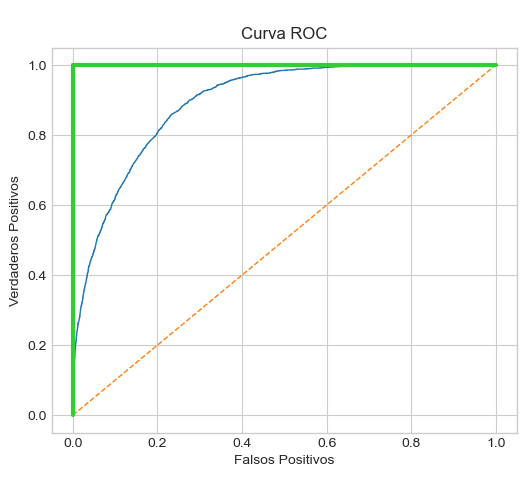

--------------------------------------------------------------------------------
ROC auc score: 
 0.894055691275196


In [62]:
model_4 = sklearn_model(dataframe=df_sklearn_99, tamaño_testeo=.3, semilla_random=7, fit_intercept_modelo=True, class_weight_modelo='balanced')
model_4

    Dado que las métricas reportadas mediante la función classification_report() para el modelo 1 y 2 son idénticas, se hará la comparación entre los modelos 2, 3 y 4. Estos modelos fueron los que consideraron un intervalo de confianza al 99%.

    El modelo 2 tiene un desempeño general aceptable, con un valor de accuracy de 0.84 que indica un buen valor de exactitud. Sin embargo, tiene problemas para clasificar correctamente los casos donde 'income' es igual a 1, es decir, los casos que corresponden a ingresos mayores a 50K dólares. Esto se ve reflejado en un valor de 'Recall' igual a 0.56. Debido a esto, el F1_score se ve penalizado, dando un valor de 0.63. Para los casos de 'income' igual a 0, el modelo tiene un F1_score de 0.9, lo que indica un buen desempeño en predecir este valor.

    El modelo 3, en el cual se modificó el hiperparámetro fit_intercept mantiene un buen desempeño para predecir los valores 0, con puntajes de precision, recall y f1_score iguales a 0.88 y un accuracy de 0.82. 
    Al observar la matriz de confusión, es posible notar un aumento sustancial de los falsos positivos, esto quiere decir que el modelo clasifica incorrectamente los valores 1, cuando en realidad son 0.
    Con la modificación realizada el valor de precision disminuyó 8 puntos porcentuales para 'income' igual a 1, dando como resultado 0.63. Sin embargo, en este caso recall aumentó 6 puntos porcentuales con un valor de 0.62. Como consecuencia de estos valores obtenidos, el f1_score también fue bajo, imitando el valor de recall.
    Dada la disminución de precision y el aumento de recall, el f1_score se mantuvo casi constante respecto a su modelo predecesor, variando de manera negativa en un punto porcentual.
    
    En el modelo 4 solo se modificó el hiperparámetro class_weight para realizar un balanceo automático de las clases, dejando los demás parámetros en sus valores por defecto. Como consecuencia, este modelo empeora su desempeño al predecir correctamente las etiquetas positivas. De acuerdo a la matriz de confusión, la cantidad de falsos positivos incrementó casi 3 veces respecto al modelo 2.
    Con la modificación de class_weight el puntaje de recall aumentó considerablemente llegando a 0.84.
    Similar a los modelos anteriores, el tener un puntaje alto en una métrica y un puntaje bajo en otra, significa que el f1_score será penalizado. Este modelo no fue la excepción, marcando un valor de 0.66. Cabe señalar que este corresponde al valor más alto entre los modelos para la predicción de los casos en que 'income' es igual a 1. Para los casos en que 'income' es igual a 0, el mayor valor de f1_score se obtuvo en el modelo 2 con 0.9.

    Para todos los modelos se obtuvieron los valores del área bajo la curva ROC, estos varían entre 0.88 y 0.89. Estos valores indican que los modelos tienen mejor desempeño en predecir más verdaderos positivos que falsos positivos, siendo entre un 38% y 39% superior a mecanismos de clasificación aleatoria.

# Fin Hito 4